# Python 入門講座　第６回: 残そう,未来のために。

今日の目標

>ファイルを使って、プログラムの実行結果を記録に残します。またその記録を再利用します。
>
>  - ファイル　の操作
>    - open/close/flush : file mode、 ファイルオブジェクト
>    - read/write/readline/readlines/writelines
>  - `with` 文
>  - `import` 文

# そのまえに、前回の質問について
前回2つの質問をお尋ねしました。　まずはこの質問について解説しておきます。

## ここで質問です。(その1）

>ここでクイズです。
>``` python
>a=100
>b=100
>```
>とした時、
>
>``` python
>print( a == b, a is b, id(a) == id(b))
>```
>はどんな結果になるでしょう？　結果を予想してから実行してみましょう。

実際に実行して見ましょう。

###  予想とあっていましたか？

In [1]:
a=100
b=100+0
print(f"\t {a=:}, {b=:},\t{(a == b)=:}, {(a is b)=:}, {(id(a) == id(b))=:}")

	 a=100, b=100,	(a == b)=True, (a is b)=True, (id(a) == id(b))=True


他の値でも試してみましょう。

In [2]:
for i in (100,256,257,1024):
    a=i
    b=i+0
    print(f"{i= :4d}, {a= :4d},{b= :4d}, {(a == b)= :}, {(a is b)= :}, {(id(a) == id(b))= :}")

i=  100, a=  100,b=  100, (a == b)= True, (a is b)= True, (id(a) == id(b))= True
i=  256, a=  256,b=  256, (a == b)= True, (a is b)= True, (id(a) == id(b))= True
i=  257, a=  257,b=  257, (a == b)= True, (a is b)= False, (id(a) == id(b))= False
i= 1024, a= 1024,b= 1024, (a == b)= True, (a is b)= False, (id(a) == id(b))= False


Pythonでは256以下の正の整数は特別扱いされています。
これらの数値については、インタプリタの初期化時にその数値のオブジェクトが生成／登録されています。
(短い文字列についても同様の特別の処理が行われています。）

In [3]:
for i in reversed((-6,-5,0,20,256,257)):
    a=i
    b=i+0
    print(f"{i= :4d}, {a= :4d},{b= :4d}, {(a == b)= :}, {(a is b)= :}, {(id(a) == id(b))= :}")

i=  257, a=  257,b=  257, (a == b)= True, (a is b)= False, (id(a) == id(b))= False
i=  256, a=  256,b=  256, (a == b)= True, (a is b)= True, (id(a) == id(b))= True
i=   20, a=   20,b=   20, (a == b)= True, (a is b)= True, (id(a) == id(b))= True
i=    0, a=    0,b=    0, (a == b)= True, (a is b)= True, (id(a) == id(b))= True
i=   -5, a=   -5,b=   -5, (a == b)= True, (a is b)= True, (id(a) == id(b))= True
i=   -6, a=   -6,b=   -6, (a == b)= True, (a is b)= False, (id(a) == id(b))= False


### 変数への値の代入（PythonとC/C++の比較)

「変数へ値を代入する」、「変数の値を更新する」といった操作の意味はプログラム言語によって
若干の違いがあります。ここではPythonとC/C++言語を例に、これらの操作を図解してみました。

|　C/C++　の代入|　Pythonの代入|
|:---:|:---:|
|![Cの代入](_images/C-assignment.png)|　![Pythonの代入](_images/python-assignment.png) |

C/C++言語などの伝統的なプログラム言語では、変数名はデータを保持する実体(メモリ）につけられています。この関係は、プログラムの実行中に変わることはありません。

それに対して、Pythonなどのインタプリタ型言語などでは、変数名はデータの実体を参照する際に使われます。
変数名と参照される実体との関係はプログラムの実行に従って変わっていきます。

## ここで質問です。(その2）


>`((r:=1) or (r:=r+2)) and (r:=r+4)`
>
>および
>
>`(r:=1) and (r:=r+2)) or (r:=r+4)`
>
>の結果はそれぞれ何になりますか？

試してみましょう。

In [4]:
print(f"{((r:=1) or (r:=r+2)) and (r:=r+4) = :}")
print(f"{((r:=1) and (r:=r+2)) or (r:=r+4) = :}")

((r:=1) or (r:=r+2)) and (r:=r+4) = 5
((r:=1) and (r:=r+2)) or (r:=r+4) = 3


### 式の評価の様子を一ステップ毎に見ていきましょう。

``` python
((r:=1) or (r:=r+2)) and (r:=r+4)　
```
Pythonは式を左から見て行って、評価の必要な項から順次評価を進めます。
最初の代入式で`r`は 1 に設定され、代入式の値自体も 1 になります。

``` python
(1 or (r:=r+2)) and (r:=r+4)
```
ここで、`(1 or (r:=r+2))`の論理式としては`True`であることが確定しますから、`(r:=r+2)`を計算する必要はありません。
従って、`r`は1のままです。 

``` python
1 and (r:=1+4)
```
この式の値は、`r:=1+4`の値が必要です。この式の値は `1+4`つまり`5`で、同時に`r`の値も5となります。

``` python 
1 and 5 
5
```

ということで、`((r:=1) or (r:=r+2)) and (r:=r+4)`の値は 5 となります。

### 次に第二の式をみてみましょう。
``` python
((r:=1) and (r:=r+2)) or (r:=r+4)

(　1 and (r:=1+2)) or (r:=r+4)

(　1 and 3) or (r:=3+4)

3 or　(r:=3+4) # 第2項(r:=3+4)は評価の必要なし,rは3のまま

3 
``` 
と評価がすすみ、`((r:=1) and (r:=r+2)) or (r:=r+4)`の値は3となりました。

`or`演算子の右側の項は、評価されない(実行されない）可能性があるということです。

練習として、

``` python
print(f"{((r:=0) or (r:=r+2)) and (r:=r+4) = :}")
print(f"{((r:=0) and (r:=r+2)) or (r:=r+4) = :}")
```

を考えてみましょう。

答えは、....

In [5]:
print(f"{((r:=0) or  (r:=r+2)) and (r:=r+4) = :}")
print(f"{((r:=0) and (r:=r+2)) or  (r:=r+4) = :}")

((r:=0) or  (r:=r+2)) and (r:=r+4) = 6
((r:=0) and (r:=r+2)) or  (r:=r+4) = 4


となりました。

# 今日の目標

Pythonでのファイルの取り扱いの基礎を学びます。　

- 計算結果のファイルへの保存: 
   - `open` / `.close` / `.write` / `.writelines`
   - `with`文
    
- 保存したデータを再び読み込む：
  - `.reaad`/`.readline`/`.readlines`

## ファイル内容の表示
シェルコマンド　`cat` を使えば、ファイルの中身を端末に印刷することができます。

In [6]:
!cat sample.txt

あのイーハトーヴォの
すきとおった風、
夏でも底に冷たさをもつ青いそら、
うつくしい森で飾られたモリーオ市、
郊外のぎらぎらひかる草の波。


Notes:

[「ポラーノの広場」宮沢賢治　からの引用](https://www.aozora.gr.jp/cards/000081/files/1935_19925.html)


### pythonによる　 "cat" プログラム
この`cat`と同じように、ファイルの中身を端末に印刷するプログラムを作ってみます。

In [7]:
def ファイル内容の表示(fn:str="sample.txt"):
    print("ファイル:{0:s}の内容\n".format(fn))
    with open(fn,mode="rt") as fin:
        for line in fin:
            print(line,end="")

早速実行してみましょう。

In [8]:
ファイル内容の表示("sample.txt")

ファイル:sample.txtの内容

あのイーハトーヴォの
すきとおった風、
夏でも底に冷たさをもつ青いそら、
うつくしい森で飾られたモリーオ市、
郊外のぎらぎらひかる草の波。


`cat`コマンドと同じ様に、ファイルの中身が印刷されました。
プログラムの中身を順番にみて行きましょう。

Note:

``` python
def cat(fn:str="sample.txt"):
    print("ファイル:{0:s}の内容\n".format(fn))
     with open(fn,mode="rt") as fin:
         for line in fin:
             print(line,end="")
```

### ファイルを開く : `open(fn,mode="rt")`


プログラム中でファイルを使うに、まずファイルを開きます。
pythonプログラム中で、ファイルを開くには`open()`関数を使います。
`open()`関数には、開くファイルのファイル名と、ファイルの使い方を示す`mode`を与えます。
``` python
fin=open("sample.txt",mode="rt")
```
は、"sample.txt"という名前のファイルを, 読み出し用(`r`)のテキストファイル(`t`)として開きます。
開いたファイルは`open`が返すオブジェクト　`fin`　を通じて操作（`.read/.write`などがある）をします。

####  open関数のモード

|文字 | 意味 |
|--:| :--|
|'r'|読み込み用に開く (デフォルト)|
|'w'|書き込み用に開き、まずファイルを切り詰める|
|'a'|書き込み用に開き、ファイルが存在する場合は末尾に追記する|
|'x'|排他的に生成して開く、ファイルが存在する場合は失敗する|
|'b'|バイナリモード|
|'t'|テキストモード (デフォルト)|
|'+'|ファイル内容の更新 (読み書き)|

`w+`と`r+`の違いは オープンした時に内容が切り詰められる(`w+`）か内容に追加(`r+`)かの違いがある。

Notes::
別のプログラムによって、ファイルを書き換えられないようにロックするには、

 1. os.open関数を使う。
 2. fcntl.lockfあるいは　fcntl.flock関数 を使う。
 
といった方法があります。

#### モード指定(r/a/w)による違い
ファイル オープン時の　モード指定 (`r/a/w/x`)によるopen直後の読み書き位置とファイル内容の違いを図で示します。

![](./_images/file-open-mode.png)

### ファイルを閉じる `.close()`
ファイルを使い終わったら、ファイルを閉じる`.close()`ことが ***必要*** です。
さもないと、せっかく書き込んだデータが失われるかもしれません。

### `with`文を使って,自動的に、ファイルを閉じる。: `with open(fn,mode="rt") as fin:`

ファイルを使い終わった時に、ファイルが確実に閉じられるように次の構文(`with`文）を使います。

``` python
with open(fn,mode="r") as fin:
    ...　# finを通じてファイルの操作(read/writeなど）を行う。
    ...

... # ここに到達すると ファイル fin は閉じられている。
```

Note:

>`.close()` メソッドを使って、明示的にファイルを閉じることもできますが、　閉じ忘れを避けるために、
`with`文の使用をお勧めします。
>
>``` python
>fin=open("sample.txt",mode="rt")
>...
>fin.close()
>```

>プログラムが正常に終了した場合には、計算機システムが適切に終了処理を行います。
>
>停電を含む異常な状況で終了した場合には、終了処理（close処理）が適切に行われない場合があります。
プログラム中では、ファイルを開いておく必要がなくなれば、閉じておくことが推奨されます。
`with`文はその振る舞いをより簡潔にしてくれるプログラム言語の機能です。
>
>`with`文はファイルだけでは、コンテキストマネージャと呼ばれる機能を持つオブジェクトに対して、利用することができます。

### ファイルの中身を順番に読む
ファイルの中身を「一行毎に読み込んで、処理する」
には、`for`文を次の形で使います。

``` python
for line in fin:
            print(line,end="")
```

行の終わりは、`\n`, `\r\n` `\r` のいずれでも対応します(Universal newlines).
読み込んだ行末のEOL(End of Line)は"\n"となっています。　(newline 引数を指定することで、変更可能です。）

Notes:

>ファイルオブジェクトの `.readlines()`メソッドや、`.readline()`メソッド
を使ったほぼ等価なプログラムも可能です。
>
>``` python
>for line in fin.readlines():
>    ...
>
>```
>あるいは
>``` python
>while (line:=fin.readline()):
>    ...
>
>```
>
>しかしながら、大きなファイルを読み込む場合には、最初の方法が**読みやすさ**/メモリ効率/実行時間 の面から有利です。


> newlineオプション
> ファイルをオープンする際にnewlineオプションを指定することで、EOL文字の取り扱いが変わります。
>- 入力：
>  - newline=None (default) : ユニバーサル改行モードが有効になります。入力中の行は '\n', '\r', または '\r\n' で終わり、呼び出し元に返される前に '\n' に変換されます。
>  - newline='' (空文字列)　： ユニバーサル改行モードは有効になりますが、行末は変換されずに呼び出し元に返されます。
>  - newline= '\n', '\r', '\r\n'のいずれかの場合:入力行は与えられた文字列でのみ終わり、行末は変換されずに呼び出し元に返されます。
>- 出力：
>   - newline=None (default) :出力文字列中の全ての '\n' 文字はシステムのデフォルトの行セパレータ os.linesep に変換されます
>   - newline='' (空文字列) または　'\n' : 行末文字は変換されません
>   - newline = '\r' または　'\r\n' : 出力文字列中の全ての '\n' 文字は与えられた文字列に変換されます。

### 別の方法(1): 一行ずつ読む。
歴史的な事情もあり、推奨の方法以外にも行毎の処理を行う方法がpythonには存在します。

ここで、それらの方法も紹介しますが、
明確な理由(例えば、古いバージョンのPythonしか使えないとか）がない限り、
推奨の方法を使うのが良いでしょう。

In [9]:
def ファイル内容の表示F(fn="sample.txt"):
    print("\nファイル:{}の内容(assign expression)\n".format(fn))
    with open(fn,mode="r")as fin:
        while (line:=fin.readline()): # ファイルから一行分だけを読み込む。 
            print(line,end="")

In [10]:
ファイル内容の表示F()


ファイル:sample.txtの内容(assign expression)

あのイーハトーヴォの
すきとおった風、
夏でも底に冷たさをもつ青いそら、
うつくしい森で飾られたモリーオ市、
郊外のぎらぎらひかる草の波。


### 別の方法(2)：まとめて読む。

`.readlines()`や`.read()`メソッドを使うと、ファイル中の全てのデータを一気に読み出すことができます。

ファイルのサイズが非常に大きい時には、大量のメモリが必要となります。また、全てのデータを
読み込むまで、プログラムはそこで待たされることになります。

ということで、`.readlines()`や`.read()`は特別な事情がない限り、使わない方が良いでしょう。

In [11]:
def ファイル内容の表示L(fn="sample.txt"):
    print("\nファイル:{}の内容(readlines)\n".format(fn))
    with open(fn,mode="r")as fin:
        for line in fin.readlines(): # ファイルの中身を行毎のリストとして読み込む。
            print(line,end="")

def ファイル内容の表示B(fn="sample.txt"):
    print("\nファイル:{}の内容(read)\n".format(fn))
    print(open(fn,mode="r").read(),end="") #ファイルの内容を一気に読み込む。

In [12]:
ファイル内容の表示L()
ファイル内容の表示B()


ファイル:sample.txtの内容(readlines)

あのイーハトーヴォの
すきとおった風、
夏でも底に冷たさをもつ青いそら、
うつくしい森で飾られたモリーオ市、
郊外のぎらぎらひかる草の波。

ファイル:sample.txtの内容(read)

あのイーハトーヴォの
すきとおった風、
夏でも底に冷たさをもつ青いそら、
うつくしい森で飾られたモリーオ市、
郊外のぎらぎらひかる草の波。


Notes::

引数付きの`read(n)`はバイナリモードでファイルを取り扱う際には、頻繁に使われるでしょう。

## テキストファイルとバイナリファイル

ファイルの本体は全てバイトデータの並びです。その意味では、全てのファイルはバイナリファイルとして読み込めます。

テキスト、画像、音声、動画、その他さまざまなデータをそれらのデータ形式に合った形で読み込むことが必要です。

`open()`関数では、ファイルの内容がテキストであることがわかっていれば(`t`)
エンコーディング（`encoding`)を指定することで、テキスト(ユニコード）として読むために必要な処理をプログラム処理系が行なってくれます。 

Note:
画像／音声／動画などが収められたファイルでは、それらのデータを適切に取り扱うための関数が用意されていることが普通です。

未知のデータファイルあるいは独自に定義されたでーた形式を取り扱うためには、バイナリファイルとして取り扱う必要がありますが、
一般ユーザーがそのような場面に遭遇する機会は無くなってきています。

In [13]:
with open("sample.txt",mode="r",encoding="utf-8") as fin:
    print("テキスト：", fin.readline(),end="")
    
with open("sample.txt",mode="rb") as fin:
    line=fin.readline()
    print("バイナリ:", line)
    print("デコード：", line.decode("utf-8"),end="")

テキスト： あのイーハトーヴォの
バイナリ: b'\xe3\x81\x82\xe3\x81\xae\xe3\x82\xa4\xe3\x83\xbc\xe3\x83\x8f\xe3\x83\x88\xe3\x83\xbc\xe3\x83\xb4\xe3\x82\xa9\xe3\x81\xae\n'
デコード： あのイーハトーヴォの


## ファイルへの出力

次に、以前に作成した数表印刷プログラムを元に、数表をファイルに書き出すプログラムを作ってみます。

### print文を使った、数表印刷プログラム

```python
def 数表の印刷():
    print ("フィボナッチ数の数表".center(66,"_"))
    print ( "   {0}".format(
        ",".join(("    {0:02d}".format(c) for c in range(10))))
      )
    for r in range(0,30,10):
        print("{0:02d}:{1}".format(
            r,
            ",".join(("{0:6d}".format(fib(c)) for c in range(r,r+10)))
        ))
```

端末に文字列を書き出す関数`print()`をファイルへの書き出しの関数(メソッド）`.write()`に書き換えればよさそうです。

In [14]:
from fibonacci import fib

def 数表の印刷():
    print ("フィボナッチ数の数表".center(66,"_"))
    print ( "   {0}".format(
        ",".join(("    {0:02d}".format(c) for c in range(10))))
      )
    for r in range(0,30,10):
        print("{0:02d}:{1}".format(
            r,
            ",".join(("{0:6d}".format(fib(c)) for c in range(r,r+10)))
        ))
数表の印刷()        

____________________________フィボナッチ数の数表____________________________
       00,    01,    02,    03,    04,    05,    06,    07,    08,    09
00:     1,     1,     2,     3,     5,     8,    13,    21,    34,    55
10:    89,   144,   233,   377,   610,   987,  1597,  2584,  4181,  6765
20: 10946, 17711, 28657, 46368, 75025,121393,196418,317811,514229,832040


In [15]:
from fibonacci import fib

def 数表の保存0(fn="Fibonacci_table.txt"):                # 第0試作
    with open(fn,mode="wt") as fout:                    # 書き出し(w)用にファイルを開く
        fout.write("フィボナッチ数の数表".center(66,"_"))  # print() -> fout.write()
        fout.write ( "   {0}".format(
            ",".join(("    {0:02d}".format(c) for c in range(10))))
          )
        for r in range(0,30,10):
            fout.write("{0:02d}:{1}".format(
                r,
                ",".join(("{0:6d}".format(fib(c)) for c in range(r,r+10)))
            ))    

試してみましょう。

In [16]:
if __name__ == "__main__":
    数表の保存0()
    ファイル内容の表示("Fibonacci_table.txt")

ファイル:Fibonacci_table.txtの内容

____________________________フィボナッチ数の数表____________________________       00,    01,    02,    03,    04,    05,    06,    07,    08,    0900:     1,     1,     2,     3,     5,     8,    13,    21,    34,    5510:    89,   144,   233,   377,   610,   987,  1597,  2584,  4181,  676520: 10946, 17711, 28657, 46368, 75025,121393,196418,317811,514229,832040

数値は表示されましたが、改行されずに一行に出力されてしまいました。

`print()`とは異なり、ファイルの`.write()`は**改行を追加してくれません**。
明示的に改行コード **"\n"** をファイルに書き込む必要があります。

各行を書き出す際に **"\n"** を追加するように書き換えてみます。

In [17]:
def 数表の保存1(fn="Fibonacci_table.txt"):
    with open(fn,mode="w") as fout:
        fout.write("{0}\n".format(                # \n 追加
            "フィボナッチ数の数表".center(66,"_"))
                )
        fout.write ( "   {0}\n".format(           # \n 追加
            ",".join(("    {0:02d}".format(c) for c in range(10))))
          )
        for r in range(0,30,10):
            fout.write("{0:02d}:{1}\n".format(   # \n 追加
                r,
                ",".join(("{0:6d}".format(fib(c)) for c in range(r,r+10)))
            ))

試してみましょう

In [18]:
数表の保存1() #改良版でファイルに数表書き出し
ファイル内容の表示("Fibonacci_table.txt") #ファイルを読み出す

ファイル:Fibonacci_table.txtの内容

____________________________フィボナッチ数の数表____________________________
       00,    01,    02,    03,    04,    05,    06,    07,    08,    09
00:     1,     1,     2,     3,     5,     8,    13,    21,    34,    55
10:    89,   144,   233,   377,   610,   987,  1597,  2584,  4181,  6765
20: 10946, 17711, 28657, 46368, 75025,121393,196418,317811,514229,832040


### `import` 文

数表保存のプログラムで使った`fib()`関数は別ファイル"fibonacci.py"で定義されています。(次ページを参照）

この様に、作成済みのプログラムを`import`文を使って、再利用することができます。 `import`されるブログラムを**モジュール(module)と呼びます。モジュールの利用法の代表的な方法には次の様なものがあります。

| インポート法　| 利用法 | 意味 |
| :----: | :---:| :---:|
|`from  fibonacci import fib` | `print (fib(10))` | モジュール `fibonacci` から `fib`をインポート|
|`from  fibonacci import *` | `print (fib(10))` | モジュール `fibonacci` から 全てをインポート|
|`import fibonacci` | `print( fibonacci.fib(10)`| モジュール`fibonacci` をインポート|

Note:

モジュール中の関数を利用するためには、

``` python
from  fibonacci import fib
```
としてモジュール中の特定の関数をインポートする方法と、

``` python
from  fibonacci import *
```

によって、`fibnacci`モジュール中の全ての関数や変数をインポートする方法があります。

いずれの場合にも、`fibonacci.py`で定義した関数`fib()`を

``` python
print ( fib(10) )
``` 
という様に利用することができます。

また、

``` python
import fibonacci
```
をプログラムの初めに書くことで、`fibonacci.py`で定義した関数`fib()`をそのプログラム中で使うことができます。
``` python
print( fibonacci.fib(10) )
```

モジュール名が長い、あるいは深い階層をもったモジュールに別名をつけてインポートすることもできます。

``` python
import fibonacci as fibm
import matplotlib.pyplot as pyplot
print( fibm.fib(10))
pyplot.plot([fibm.fib(i) for i in range(100)])
```

####  fibonacchi.pyの中身
`fibonacchi.py`の中身は次のようになっています。
``` python
#!python3
def fib(n:int)->int:
    """
    returns the n-th fibonacci number.
    """
    if n in (0, 1):
        return 1
    a=b=1 
    while (n := n-1 ) > 0:
        a, b = a+b, a # a: f_{k}, b:f_{k-1}
    return a

if __name__ == "__main__":
    for i in range(10):
        print(f"{i=:}, {fib(i)=:})
```


`if __name__ == "__main__":`以下の部分は`import`の際には実行されません。
このモジュールの単独動作確認の際に役立ちます。


Note: モジュールがみつからない！？

モジュールとして使いたいファイルは確かに存在するのに、Pythonで`import`するとエラーになる。
といった時はPythonのサーチパスを確認しましょう。

pythonモジュールのサーチパスは、

```python
import sys
print(sys.path)
``` 

を実行して確認しましょう。

###  名前の衝突を避けるために、

**複数**のモジュールを同時に使う場合、同じ名前の関数名が別モジュールにもある可能性があります。

そのような場合には、名前の付け替え(`import-as`)や階層的な名前を使うことで、名前の衝突を避けることができます。

#### 名前の付け替え：

``` python
from  fibonacci import fib as FIB
print( FIB(10) )
```
として、　関数名`FIB`を使います。

In [19]:
from  fibonacci import fib as FIB
print( FIB(10) )

89


#### 階層的な名前：

``` python
import fibonacci 
print( fibonacci.fib(10) )
```

のように、モジュールを`import`した後に、モジュール名と関数名を組み合わせた`fibonacci.fib()`を関数名として使います。

モジュール名は　ファイルシステムと同じく階層的な構造を持っていることがあります　（例：.`matplotlib.pyplot`）。

```python
import matplotlib.pyplot as pyplot
pyplot.plot([fib(i) for i in range(0,10)])
```

この例の様に、深い階層を持つモジュールも`import xxx.yyy.zzz  as nnn`の構文を使うことで、使いやすくなります。

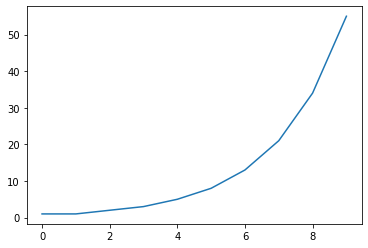

In [20]:
import fibonacci 
import matplotlib.pyplot as pyplot
pyplot.plot([fibonacci.fib(i) for i in range(0,10)]);

# 本日のまとめ #

 1. ファイルの操作： `open`/`.close`/`.readline`/`.write`
 1. with 文 : `with ... as ... :`
 1. モジュール(import 文): `import <module>`/`from <mdule> import <name>`


## この先にあるものは？

- ファイルの指定：
    path名とファイル名
    - os.path モジュール
- sys.stdin,sys.stdout,sys.stderr
   - print()
   - input()
- デバイスファイルからの入出力
- ネットワーク経由のデータ交換:`socket`
- データ保存のためのファイル形式

  - jsonファイルを読み書きする。( yaml, pickle, ..)
  - csvファイルを読み書きする。
  
- Binary File/Text File:全てのファイルはもとを辿れば　Binaryファイル
    - 全てのファイルはバイトデータが集まったもの。
    - Text file: バイトデータをTextと解釈して読み込む。
        - encoding: utf-8, sjis, ...
    - バイナリデータ：　バイト列データを、数字として読み込んだり、画像として読み込んだり、動画として読み込んだり、... 
      - array モジュール　、 struct モジュール, numpy
    - エクセルファイルを読み書きする。
    - ROOT ファイルを読み書きする。  


##`input`/`print`

端末(キーボード）からの入力は`sys.stdin.readline`を、端末ディスプレイへの出力は`sys.stdout.write`を使えば実現可能です。

In [21]:
name=input("お名前を教えてください：").strip()
print(f"\nこんにちは、　{name}さん。お会いできて光栄です\n")

お名前を教えてください： Noboru



こんにちは、　Noboruさん。お会いできて光栄です



### stdin/stdout/stderr
オープンしたファイルには、ファイル番号が付けられています。
例えば、つぎのようになります。

``` python
>>> open("sample.txt",mode="rt").fileno()
3
```
初めて開いたファイルにも関わらず、0でも1でもなく3になっています。

これは、pythonでは0,1,2のファイル番号はそれぞれ `stdin`, `stdout`, `stderr`と呼ばれる三つのファイルが標準入出力として予約されているためです。

``` python
>>> import sys
>>> sys.stdin.fileno(),sys.stdout.fileno(),sys.stderr.fileno(),
(0, 1, 2)
```
端末への入出力はこれらのファイルを使うことで実現できます。

In [22]:
import sys
sys.stdout.write("Welcome to Python world.\n")

Welcome to Python world.


25

In [23]:
def ask():
    name=input("お名前は？　").strip()
    print(f"こんにちは、{name} さん。お会いできて光栄です")
ask()

お名前は？　 Noboru Yamamoto


こんにちは、Noboru Yamamoto さん。お会いできて光栄です


In [24]:
import sys
def ask():
    sys.stdout.write("お名前は？　")
    sys.stdout.flush()
    name=sys.stdin.readline().strip()
    sys.stdout.write(f"\nこんにちは、{name} さん。お会いできて光栄です\n")

jupyter/jupyterlabのノートブックでは`input`と`sys.stdout`の取り扱いが異なるため、
スクリプトとして実行した場合と結果が異なります。